In [9]:
import os
import numpy as np
import pandas as pd

train_dir = "/mnt/c/Users/akrc2/Downloads/fruits/train"
valid_dir = "/mnt/c/Users/akrc2/Downloads/fruits/validation"
test_dir = "/mnt/c/Users/akrc2/Downloads/fruits/test"
num_classes = 36

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

2023-07-02 13:49:32.358328: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-02 13:49:32.711022: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-02 13:49:32.713156: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-02 13:49:34.020416: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

validation_generator = validation_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

Found 3115 images belonging to 36 classes.
Found 359 images belonging to 36 classes.
Found 351 images belonging to 36 classes.


In [4]:
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

2023-07-02 13:49:46.560753: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-02 13:49:46.561111: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


9406464/9406464 [==============================] - 1s 0us/step


In [5]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation="relu")(x)
predictions = Dense(num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [6]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [7]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

Epoch 1/10


2023-07-02 13:50:02.237676: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


16/97 [===>..........................] - ETA: 2:23 - loss: 2.6344 - accuracy: 0.3555

/home/alper/.local/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


97/97 [==============================] - ETA: 0s - loss: 1.2743 - accuracy: 0.6387

2023-07-02 13:53:15.505589: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


97/97 [==============================] - 209s 2s/step - loss: 1.2743 - accuracy: 0.6387 - val_loss: 0.4213 - val_accuracy: 0.8594
Epoch 2/10
97/97 [==============================] - 177s 2s/step - loss: 0.5127 - accuracy: 0.8388 - val_loss: 0.3241 - val_accuracy: 0.8938
Epoch 3/10
97/97 [==============================] - 154s 2s/step - loss: 0.3296 - accuracy: 0.8894 - val_loss: 0.2306 - val_accuracy: 0.9312
Epoch 4/10
97/97 [==============================] - 145s 2s/step - loss: 0.2540 - accuracy: 0.9147 - val_loss: 0.2129 - val_accuracy: 0.9187
Epoch 5/10
97/97 [==============================] - 147s 2s/step - loss: 0.2154 - accuracy: 0.9283 - val_loss: 0.2050 - val_accuracy: 0.9406
Epoch 6/10
97/97 [==============================] - 151s 2s/step - loss: 0.1627 - accuracy: 0.9465 - val_loss: 0.1801 - val_accuracy: 0.9312
Epoch 7/10
97/97 [==============================] - 152s 2s/step - loss: 0.1274 - accuracy: 0.9591 - val_loss: 0.1988 - val_accuracy: 0.9438
Epoch 8/10
97/97 [======

In [10]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.274315,0.638664,0.421291,0.859375
1,0.512737,0.838793,0.324073,0.893750
2,0.329622,0.889393,0.230639,0.931250
3,0.253990,0.914693,0.212915,0.918750
4,0.215369,0.928317,0.205019,0.940625


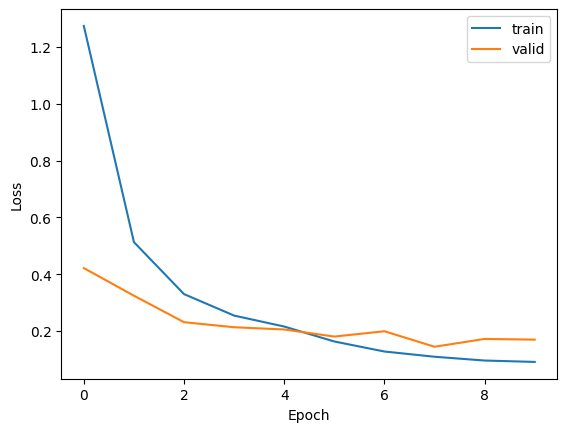

In [11]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "valid"])
plt.show()

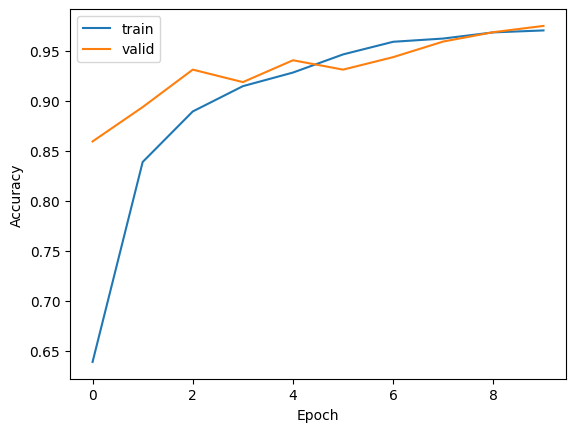

In [12]:
plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "valid"])
plt.show()

In [13]:
preds = model.predict(test_generator)

2023-07-02 14:18:20.034017: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


12/12 [==============================] - 16s 1s/step


In [15]:
os.listdir(train_dir)

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [16]:
y_pred = np.argmax(preds, axis=1)

In [18]:
for k, v in test_generator.class_indices.items():
    print(v, ":", k)

0 : apple
1 : banana
2 : beetroot
3 : bell pepper
4 : cabbage
5 : capsicum
6 : carrot
7 : cauliflower
8 : chilli pepper
9 : corn
10 : cucumber
11 : eggplant
12 : garlic
13 : ginger
14 : grapes
15 : jalepeno
16 : kiwi
17 : lemon
18 : lettuce
19 : mango
20 : onion
21 : orange
22 : paprika
23 : pear
24 : peas
25 : pineapple
26 : pomegranate
27 : potato
28 : raddish
29 : soy beans
30 : spinach
31 : sweetcorn
32 : sweetpotato
33 : tomato
34 : turnip
35 : watermelon


In [20]:
pred_classes = {
    0 : "apple",
    1 : "banana",
    2 : "beetroot",
    3 : "bell pepper",
    4 : "cabbage",
    5 : "capsicum",
    6 : "carrot",
    7 : "cauliflower",
    8 : "chilli pepper",
    9 : "corn",
    10 : "cucumber",
    11 : "eggplant",
    12 : "garlic",
    13 : "ginger",
    14 : "grapes",
    15 : "jalepeno",
    16 : "kiwi",
    17 : "lemon",
    18 : "lettuce",
    19 : "mango",
    20 : "onion",
    21 : "orange",
    22 : "paprika",
    23 : "pear",
    24 : "peas",
    25 : "pineapple",
    26 : "pomegranate",
    27 : "potato",
    28 : "raddish",
    29 : "soy beans",
    30 : "spinach",
    31 : "sweetcorn",
    32 : "sweetpotato",
    33 : "tomato",
    34 : "turnip",
    35 : "watermelon"
}

In [21]:
y_pred = list(map(lambda x: pred_classes[x], y_pred))

In [22]:
y_test = list(map(lambda x: pred_classes[x], test_generator.classes))

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_pred, y_test))

               precision    recall  f1-score   support

        apple       0.90      0.75      0.82        12
       banana       0.78      1.00      0.88         7
     beetroot       1.00      1.00      1.00        10
  bell pepper       1.00      0.77      0.87        13
      cabbage       1.00      1.00      1.00        10
     capsicum       0.70      1.00      0.82         7
       carrot       1.00      1.00      1.00        10
  cauliflower       1.00      1.00      1.00        10
chilli pepper       1.00      0.91      0.95        11
         corn       1.00      0.83      0.91        12
     cucumber       1.00      1.00      1.00        10
     eggplant       1.00      1.00      1.00        10
       garlic       1.00      1.00      1.00        10
       ginger       1.00      1.00      1.00        10
       grapes       1.00      1.00      1.00        10
     jalepeno       1.00      0.91      0.95        11
         kiwi       1.00      1.00      1.00        10
        l